In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./acsincome_ca_features.csv"
csv_labels = "./acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.01
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

On ne standardize que les sets de feature, les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

# SVM

In [16]:
# Creation d'une instance de SVM
SVM_model = SVC()

# Test avec default parameters
SVM_model.fit(X_train, Y_train)
print("Model score on test dataset: ", SVM_model.score(X_test,Y_test))
print("Model score on train dataset:", SVM_model.score(X_train,Y_train))

Model score on test dataset:  0.7755102040816326
Model score on train dataset: 0.8305626598465473


Default model score with 1% : 0.7755

with 10% : 0.7969

with 20% : 0.8044

with 50% : 0.8058

In [17]:
score = cross_val_score(SVC(), X_train, Y_train, cv=5).mean()

print(score)

0.7755591054313099


Score moyen obtenu par cross validation du modèle avec les paramètres défauts : 0.7999

## 1. Recherche de paramètres

Default parameters :
- C = 1
- kernel = rbf
- gamma = scale

### C

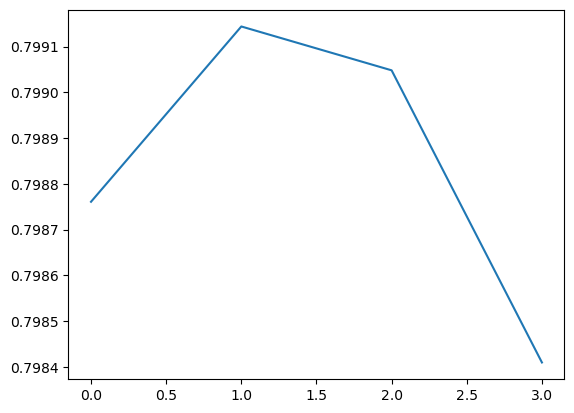

In [27]:
# Cross validation avec variation de C
# train_score,val_score = validation_curve(SVM_model, X_train, Y_train,'C', k, cv=5)

val_score = []
for c in range(1,5):
    score = cross_val_score(SVC(c=k), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# print(val_score.mean())

La configuration optimale semble être avec un C aux alentours de 1 pour 10% du dataset.

### Kernel

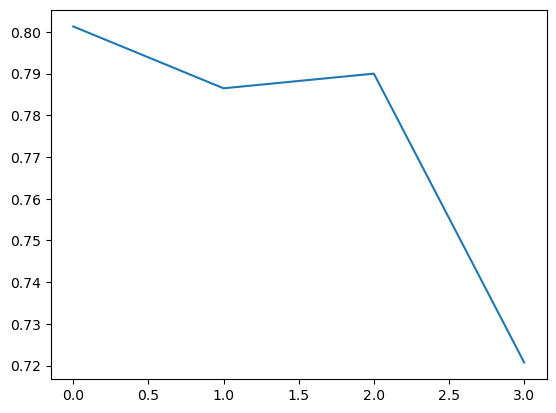

In [9]:
# Cross validation avec variation du kernel
# train_score,val_score = validation_curve(SVM_model, X_train, Y_train,'C', k, cv=5)

val_score = []
for k in ['rbf', 'linear', 'poly', 'sigmoid']:
    score = cross_val_score(SVC(kernel=k), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# print(val_score.mean())

La meilleure configuration semble être avec un kernel en 'rbf'

### Gamma : 

Score pour le paramètre gamma scale :  0.7998978288633461
Score pour le paramètre gamma auto :  0.8000255427841635
Score pour le paramètre gamma 0.01 :  0.792486014713623
Score pour le paramètre gamma 0.05 :  0.7992585248022066
Score pour le paramètre gamma 0.07 :  0.7988756278587721
Score pour le paramètre gamma 0.09 :  0.8001531750986416
Score pour le paramètre gamma 0.1 :  0.8000255427841635
Score pour le paramètre gamma 0.11 :  0.7986200368044589
Score pour le paramètre gamma 0.13 :  0.7981086914831544
Score pour le paramètre gamma 0.15 :  0.7974699586663891
Score pour le paramètre gamma 0.5 :  0.7883980267587186
Score pour le paramètre gamma 1.0 :  0.7780476499414475
Score pour le paramètre gamma 2.0 :  0.7454642788651824


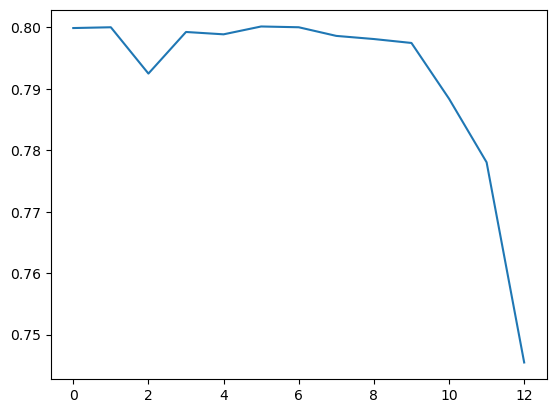

In [59]:
val_score = []
for g in ['scale','auto', 0.01, 0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15, 0.5, 1.0, 2.0]:
    score = cross_val_score(SVC(gamma=g), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre gamma", g, ": ",score)
    val_score.append(score)

plt.plot(val_score)


Score pour le paramètre gamma scale :  0.7998978288633461
Score pour le paramètre gamma auto :  0.8000255427841635
Score pour le paramètre gamma 0.07 :  0.7988756278587721
Score pour le paramètre gamma 0.09 :  0.8001531750986416
Score pour le paramètre gamma 0.093 :  0.7998975840443285
Score pour le paramètre gamma 0.097 :  0.8000255427841635
Score pour le paramètre gamma 0.1 :  0.8000255427841635
Score pour le paramètre gamma 0.11 :  0.7986200368044589


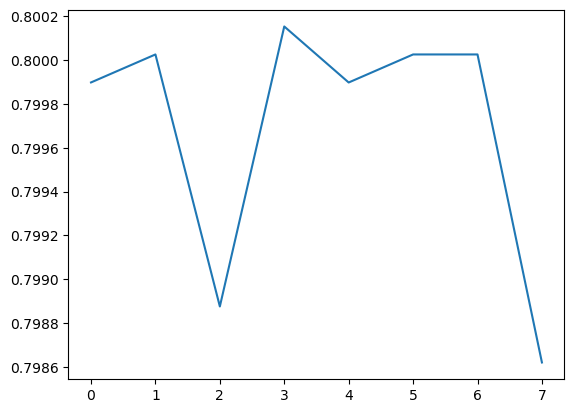

In [60]:
val_score = []
for g in ['scale','auto', 0.07, 0.09, 0.093, 0.097, 0.1, 0.11]:
    score = cross_val_score(SVC(gamma=g), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre gamma", g, ": ",score)
    val_score.append(score)

plt.plot(val_score)


0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


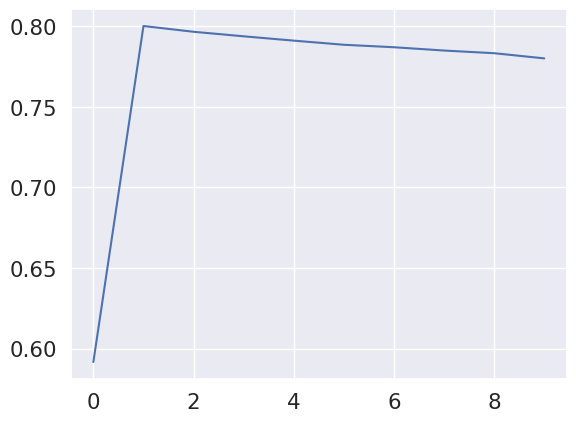

In [31]:
val_score = []
tab = np.arange(0.0, 1.0, 0.1)


for g in tab:
    print(g)
    score = cross_val_score(SVC(gamma=g), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

Auto convient mieux

Graphe pas pertinent ici

### Degree

0
1
2
3
4
5
6


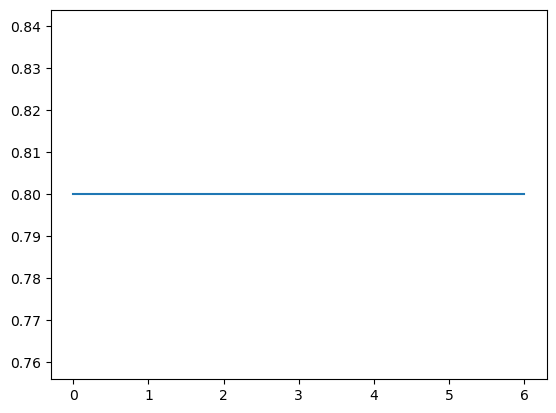

In [51]:
val_score = []
for D in range(0,7):
    print(D)
    score = cross_val_score(SVC(degree=D), X_train, Y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# print(val_score.mean())

Pas d'évolution en fonction de la variation du paramètre.

### class weight

Score pour le paramètre class_weight None :  0.7998978288633461
Score pour le paramètre class_weight balanced :  0.7881411300029787


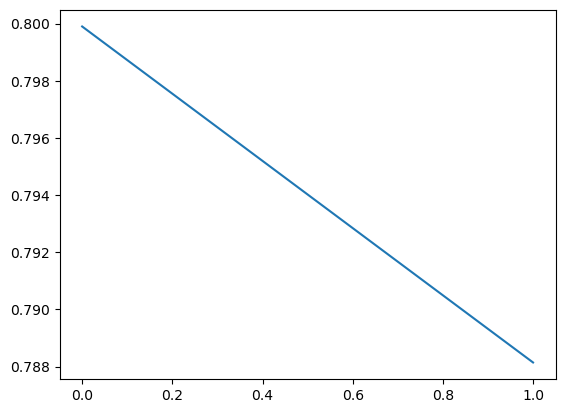

In [54]:
val_score = []
for cw in [None,'balanced']:
    score = cross_val_score(SVC(class_weight=cw), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre class_weight", cw, ": ",score.mean())
    val_score.append(score)

plt.plot(val_score)


Mieux en Paramètres par défaut !

## 2. Evaluation de la qualité du modèle avec les paramètres choisis

In [10]:
SVM_model = SVC(gamma=0.09)
SVM_model.fit(X_train, Y_train)
print("modele entrainé")

modele entrainé


### Accuracy

In [11]:
predictions = SVM_model.predict(X_test)

res = pd.Series(predictions)
res.value_counts()

False    1164
True      793
Name: count, dtype: int64

In [12]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7961


### Classification report

In [13]:
report = classification_report(Y_test, predictions)
print('Classification Report y_test et predictions en svm:\n', report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.83      0.83      0.83      1165
        True       0.75      0.75      0.75       792

    accuracy                           0.80      1957
   macro avg       0.79      0.79      0.79      1957
weighted avg       0.80      0.80      0.80      1957



### Confusion Matrix

In [14]:
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix Y_test et predictions en svm :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[965 200]
 [199 593]]


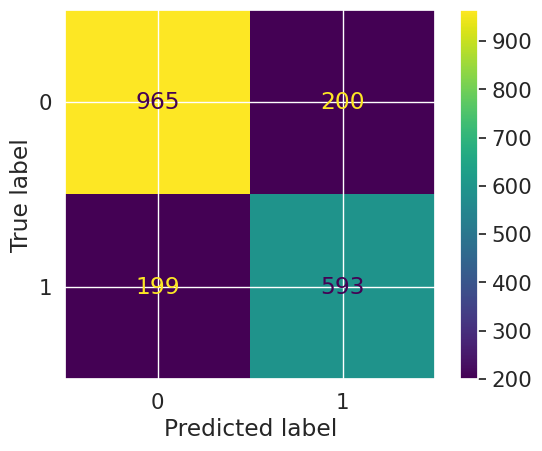

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

<Axes: >

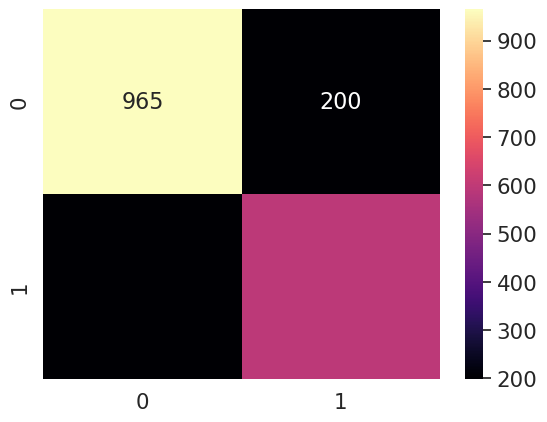

In [27]:
# sns.set_theme(font_scale=1.4)  # ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap='magma')


## 3. Gridsearch

5 min pour le faire tourner avec 1% dataset.

In [4]:
nb_plis=5
# kf = KFold(n_splits=nb_plis, shuffle=True, random_state=42)

param_grid = {'C' : np.arange(0.5, 2, 0.5),
    'kernel': ['rbf', 'poly'],
    'gamma' : np.arange(0.8, 1.0, 0.05),
}
grid = GridSearchCV(SVC(), param_grid, cv=5)

# grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=kf)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.5, 1. , 1.5]),
                         'gamma': array([0.8 , 0.85, 0.9 , 0.95]),
                         'kernel': ['rbf', 'poly']})

In [5]:
print("best score : ",grid.best_score_)

print("best parameters : ", grid.best_params_)

best score :  0.753170312115999
best parameters :  {'C': 1.0, 'gamma': 0.8, 'kernel': 'rbf'}


In [6]:
Best_SVM = grid.best_estimator_

In [7]:
Best_SVM.score(X_test, Y_test)

0.7423469387755102

## 4. Evaluation de la qualité du modèle avec les meilleurs hyperparamètres

### Accuracy

In [8]:
Best_predictions = Best_SVM.predict(X_test)

Best_res = pd.Series(Best_predictions)
Best_res.value_counts()

False    256
True     136
Name: count, dtype: int64

In [9]:
Best_accuracy = accuracy_score(Y_test, Best_predictions)
print(f'Accuracy : {Best_accuracy:.4f}')

Accuracy : 0.7423


### Classification report

In [10]:
Best_report = classification_report(Y_test, Best_predictions)
print('Classification Report y_test et predictions en svm:\n', Best_report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.73      0.86      0.79       217
        True       0.77      0.60      0.68       175

    accuracy                           0.74       392
   macro avg       0.75      0.73      0.73       392
weighted avg       0.75      0.74      0.74       392



### Confusion Matrix

In [11]:
conf_matrix = confusion_matrix(Y_test, Best_predictions)
print('Confusion Matrix Y_test et predictions en svm :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[186  31]
 [ 70 105]]


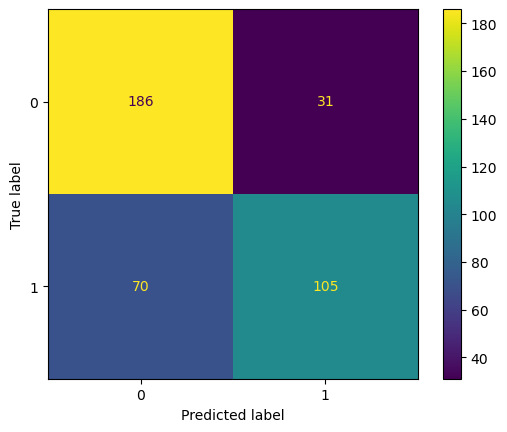

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

<Axes: >

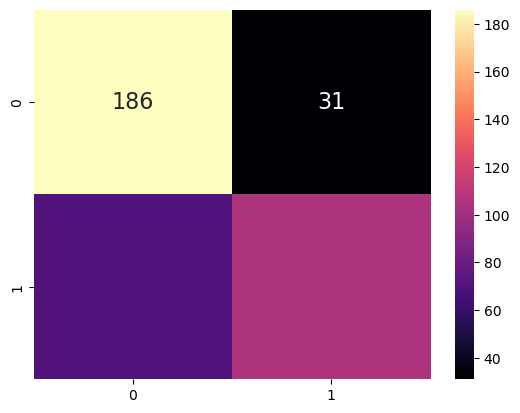

In [13]:
# sns.set_theme(font_scale=1.4)  # ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap='magma')
